- В этом проекте мы сгенерируем синтетические данные с двумя признаками.

- Затем мы классифицируем эти точки с помощью:
    - **K-ближайших соседей (KNN)**
    - **Решающее дерево**
    - **Логистическая регрессия**
    - **Метод опорных векторов (SVM)**
    - **Случайный лес (Random Forest)**
    - **Градиентный бустинг (Gradient Boosting)**

- Мы также визуализируем точки и границы решений и оценим производительность модели с помощью:
    - **Accuracy**: доля правильно предсказанных значений среди всех предсказанных (точность модели).
    - **Precision**: доля правильных предсказаний среди всех предсказанных положительных.
    - **Recall**: доля правильно предсказанных положительных среди всех реальных положительных.
    - **F1-score**: гармоническое среднее между precision и recall.
    - **ROC-AUC**: площадь под кривой ROC, которая показывает качество бинарного классификатора.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [6]:
# Generating a synthetic dataset with 2 features, 2 classes, and clear separation
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, random_state=42)


In [7]:

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


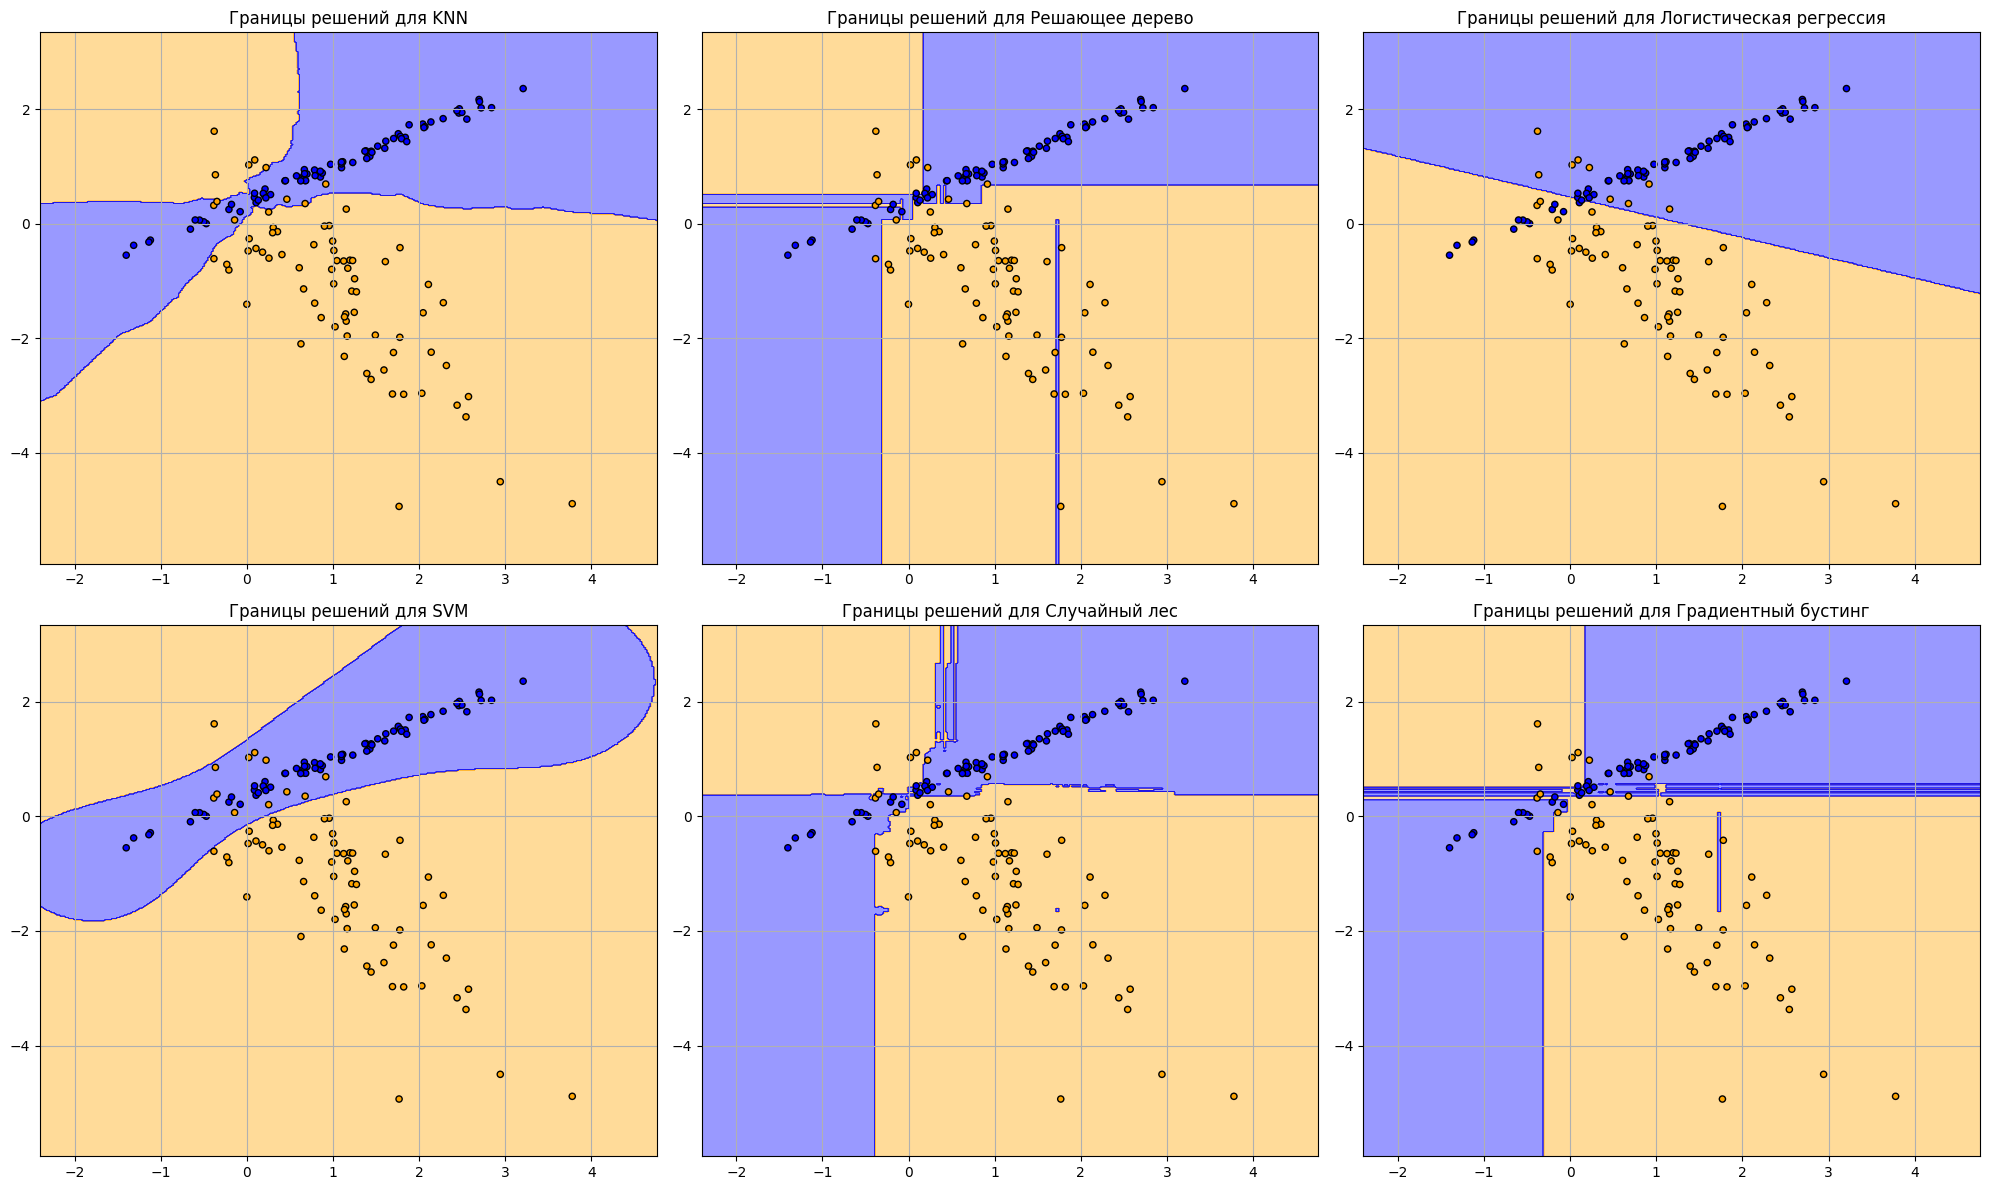

In [12]:
# Функция для визуализации разделяющих границ
def plot_decision_boundary(X, y, model, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('orange', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=ListedColormap(('orange', 'blue')))
    plt.title(f'Границы решений для {model_name}')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.grid(True)

# Создаем список моделей
models = {
    "KNN": KNeighborsClassifier(),
    "Решающее дерево": DecisionTreeClassifier(random_state=42),
    "Логистическая регрессия": LogisticRegression(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Случайный лес": RandomForestClassifier(random_state=42),
    "Градиентный бустинг": GradientBoostingClassifier(random_state=42)
}

# Обучаем модели и строим графики
plt.figure(figsize=(20, 12))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train[:, :2], y_train)  # Используем только первые два признака для визуализации
    plt.subplot(2, 3, i)
    plot_decision_boundary(X_test[:, :2], y_test, model, name)

plt.tight_layout()
plt.show()


                     Model  Accuracy  Precision    Recall  F1-Score
0                      KNN  0.960000   0.925926  1.000000  0.961538
1          Решающее дерево  0.933333   0.933333  0.933333  0.933333
2  Логистическая регрессия  0.846667   0.871429  0.813333  0.841379
3                      SVM  0.926667   0.872093  1.000000  0.931677
4            Случайный лес  0.960000   0.936709  0.986667  0.961039
5      Градиентный бустинг  0.946667   0.935065  0.960000  0.947368


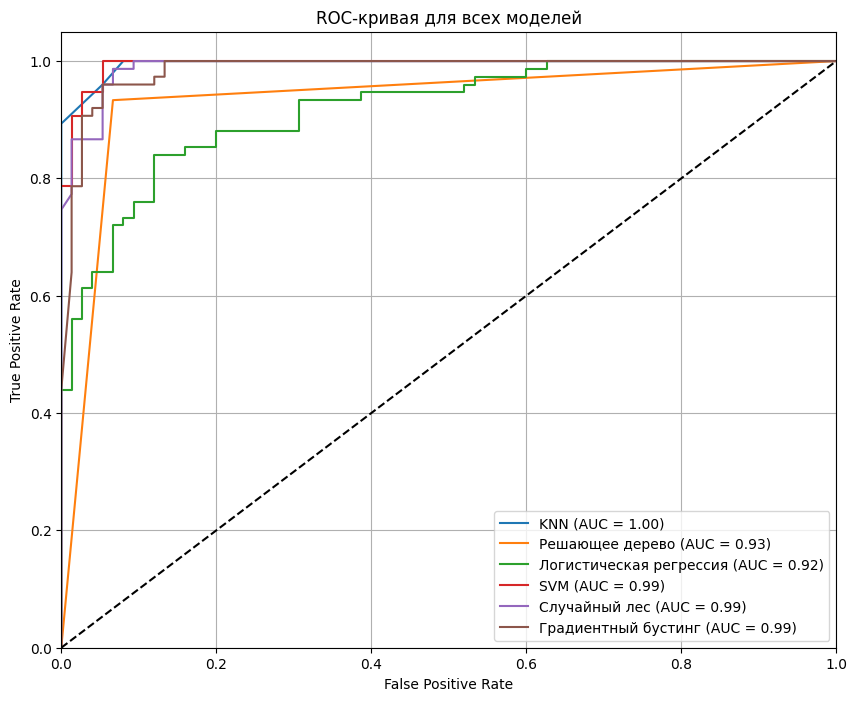

In [11]:
# Функция для вывода метрик
def evaluate_models(models, X_test, y_test):
    metrics = {
        "Model": [],
        "Accuracy": [],
        "Precision": [],
        "Recall": [],
        "F1-Score": []
    }
    
    for name, model in models.items():
        y_pred = model.predict(X_test)
        
        # Добавляем метрики в словарь
        metrics["Model"].append(name)
        metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["Precision"].append(precision_score(y_test, y_pred))
        metrics["Recall"].append(recall_score(y_test, y_pred))
        metrics["F1-Score"].append(f1_score(y_test, y_pred))
    
    # Создаем DataFrame для компактного вывода метрик
    df_metrics = pd.DataFrame(metrics)
    return df_metrics

# Обучаем модели и оцениваем их
models = {
    "KNN": KNeighborsClassifier(),
    "Решающее дерево": DecisionTreeClassifier(random_state=42),
    "Логистическая регрессия": LogisticRegression(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Случайный лес": RandomForestClassifier(random_state=42),
    "Градиентный бустинг": GradientBoostingClassifier(random_state=42)
}

# Обучаем модели
for name, model in models.items():
    model.fit(X_train, y_train)

# Выводим таблицу с метриками
metrics_df = evaluate_models(models, X_test, y_test)
print(metrics_df)

# ROC-кривые для бинарной классификации
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    for name, model in models.items():
        if hasattr(model, "predict_proba"):  # Проверка, есть ли метод predict_proba
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)
        
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Линия случайных угадываний
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая для всех моделей')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Визуализируем ROC-кривые
plot_roc_curve(models, X_test, y_test)

/var/folders/17/gx9shr111892mg1s5nnz003h0000gn/T/ipykernel_36094/3076165899.py:66: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_feature[errors], y_true[errors], c='red', edgecolor='k', label='Ошибочные предсказания', marker='x', s=100)


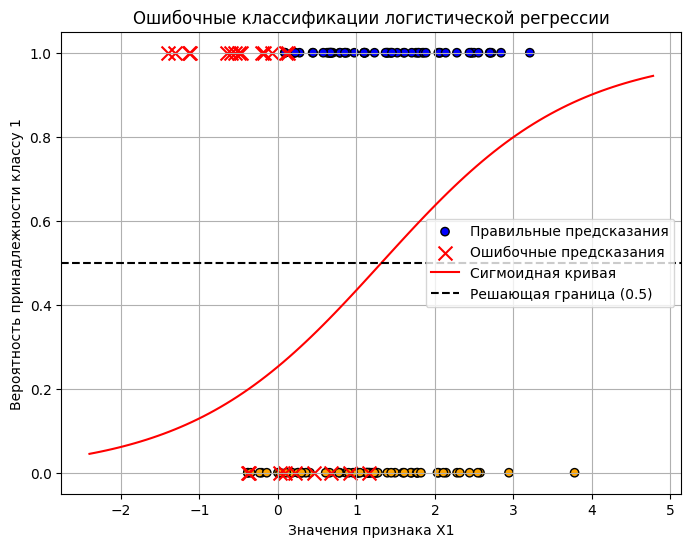

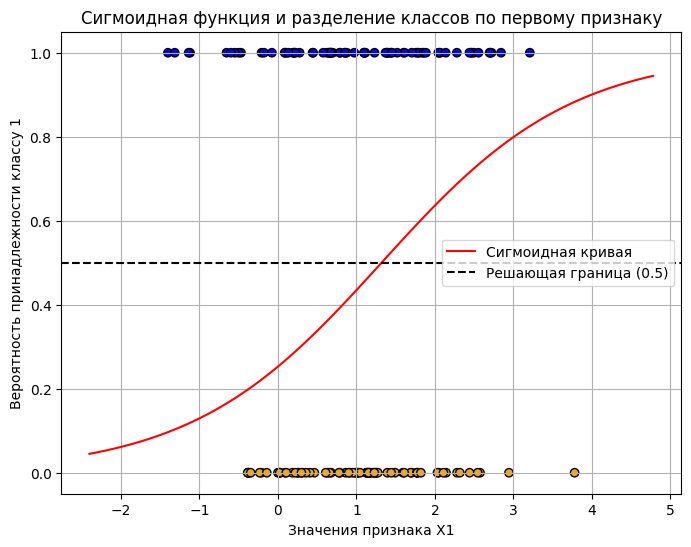

In [13]:
# Визуализируем сигмоидную функцию для одного из признаков, чтобы показать, как логистическая регрессия предсказывает классы.
# Будем рассматривать только первый признак X[:, 0] и посмотрим, как логистическая регрессия разделяет классы по сигмоиде.

# Сигмоидная функция
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функция для визуализации сигмоиды
def plot_sigmoid_boundary(X, y, model):
    # Возьмем первый признак
    X_feature = X[:, 0]
    X_feature_min, X_feature_max = X_feature.min() - 1, X_feature.max() + 1
    X_range = np.linspace(X_feature_min, X_feature_max, 100)
    
    # Получим параметры модели (theta0 + theta1 * X1)
    coef = model.coef_[0][0]
    intercept = model.intercept_[0]
    
    # Рассчитаем значения линейной комбинации для X_range
    linear_combination = intercept + coef * X_range
    probabilities = sigmoid(linear_combination)
    
    # Визуализация сигмоиды
    plt.figure(figsize=(8, 6))
    
    # Отобразим точки
    plt.scatter(X_feature, y, c=y, cmap=ListedColormap(('orange', 'blue')), edgecolor='k')
    
    # Отобразим сигмоиду
    plt.plot(X_range, probabilities, color='red', label="Сигмоидная кривая")
    
    # Линия, показывающая решение 0.5
    plt.axhline(0.5, color='black', linestyle='--', label='Решающая граница (0.5)')
    
    # Подписи и легенда
    plt.title('Сигмоидная функция и разделение классов по первому признаку')
    plt.xlabel('Значения признака X1')
    plt.ylabel('Вероятность принадлежности классу 1')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Визуализируем точки, которые были неправильно классифицированы логистической регрессией.

def plot_classification_errors(X, y_true, y_pred, model):
    # Возьмем первый признак для визуализации
    X_feature = X[:, 0]
    
    # Определим неправильно классифицированные точки
    errors = y_true != y_pred
    
    # Рассчитаем вероятности
    X_range = np.linspace(X_feature.min() - 1, X_feature.max() + 1, 100)
    coef = model.coef_[0][0]
    intercept = model.intercept_[0]
    linear_combination = intercept + coef * X_range
    probabilities = sigmoid(linear_combination)
    
    plt.figure(figsize=(8, 6))
    
    # Отображаем правильно классифицированные точки
    plt.scatter(X_feature[~errors], y_true[~errors], c=y_true[~errors], 
                cmap=ListedColormap(('orange', 'blue')), edgecolor='k', label='Правильные предсказания')
    
    # Отображаем неправильно классифицированные точки
    plt.scatter(X_feature[errors], y_true[errors], c='red', edgecolor='k', label='Ошибочные предсказания', marker='x', s=100)
    
    # Сигмоида
    plt.plot(X_range, probabilities, color='red', label='Сигмоидная кривая')
    
    # Линия, показывающая решение 0.5
    plt.axhline(0.5, color='black', linestyle='--', label='Решающая граница (0.5)')
    
    # Подписи и легенда
    plt.title('Ошибочные классификации логистической регрессии')
    plt.xlabel('Значения признака X1')
    plt.ylabel('Вероятность принадлежности классу 1')
    plt.legend()
    plt.grid(True)
    plt.show()


# Обучаем логистическую регрессию
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)


# Предсказания модели
y_pred_logistic = logistic_regression.predict(X_test)

# Визуализация ошибок
plot_classification_errors(X_test, y_test, y_pred_logistic, logistic_regression)

# Визуализируем сигмоидную функцию для первого признака
plot_sigmoid_boundary(X_test, y_test, logistic_regression)


1. K-ближайших соседей (KNN)
- **Как работает**: KNN ищет K ближайших точек к объекту и на основе голосования классифицирует его в тот класс, который преобладает среди соседей.
- **Когда использовать**: Простой алгоритм, эффективный при малых объемах данных. Лучше всего работает, если классы четко разделены.
- **Почему такие результаты**: Для четко разделенных данных KNN может показывать хорошую точность, но в случае более сложных данных его производительность может падать из-за зависимости от выбора параметра K и сложности разделяющих границ.

2. Решающее дерево (Decision Tree)**
- **Как работает:** Делит пространство признаков на несколько прямолинейных сегментов, каждый раз выбирая наилучший критерий разделения данных.
- **Когда использовать**: Хорошо работает при наличии данных с четкими правилами и отношениями между признаками. Способен уловить сложные зависимости.
- **Почему такие результаты**: Простота интерпретации, но возможна склонность к переобучению, особенно на небольших наборах данных.

3. Логистическая регрессия (Logistic Regression)
- **Как работает**: Логистическая регрессия — это линейный классификатор, который использует сигмоидную функцию для прогнозирования вероятности принадлежности объекта к одному из классов.
- **Когда использовать**: Хороший выбор для данных с линейной разделимостью. Также применяется для интерпретации влияния признаков на целевой класс.
- **Почему такие результаты**: Если данные линейно разделимы, логистическая регрессия демонстрирует высокую точность. Однако она ограничена в моделировании сложных нелинейных зависимостей.

4. Метод опорных векторов (SVM)
- **Как работает**: SVM находит гиперплоскость, которая максимально разделяет классы, и строит разделяющие границы на основе опорных векторов — критически важных точек.
- **Когда использовать**: Хорош для сложных и высокоразмерных данных, особенно если классы четко разделены. SVM часто применяется в задачах текстовой классификации и анализа изображений.
- **Почему такие результаты**: SVM хорош при наличии четко разделенных классов, однако на синтетических данных с шумом или кластерами может испытывать трудности с разделением.

5. Случайный лес (Random Forest)
- **Как работает**: Это ансамблевый метод, который строит множество решающих деревьев и объединяет их результаты для более устойчивой и точной классификации.
- **Когда использовать**: Применяется, когда требуется высокая точность и устойчивость к переобучению. Хорошо работает на разнообразных данных.
- **Почему такие результаты**: Случайный лес за счет использования нескольких деревьев и агрегирования их решений уменьшает склонность к переобучению и показывает стабильные результаты.

6. Градиентный бустинг (Gradient Boosting)
- **Как работает**: Это ансамблевый метод, который строит модели последовательно, обучаясь на ошибках предыдущих моделей.
- **Когда использовать**: Подходит для задач, где требуется высокая точность, но допустима большая вычислительная нагрузка. Применяется в задачах с небольшими количествами данных.
- **Почему такие результаты**: Градиентный бустинг способен уловить более сложные зависимости в данных, однако чувствителен к шуму и может потребовать тонкой настройки гиперпараметров.